In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from category_encoders import MEstimateEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
filepath = "/Users/balqeesjabri/Downloads/titanic.csv"
titanic_data = pd.read_csv(filepath)

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'preds' contains the predicted labels for the validation set, and 'y_valid' contains the true labels
def evaluate_classification_model(y_valid, preds):
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_valid, preds)
    recall = recall_score(y_valid, preds)
    f1 = f1_score(y_valid, preds)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_valid, preds)
    
    # Print the results
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(conf_matrix)




In [3]:
titanic_data.select_dtypes(["object"]).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [4]:
# we will drop the name column since this feature does not add any meaningful information and is unique for each sample,
# it is unlikely to help your model make accurate predictions.
titanic_data = titanic_data.drop(columns=['Name', 'PassengerId'])

In [5]:
categorical_cols = [colname for colname in titanic_data.columns if titanic_data[colname].dtype == "object"]
print(categorical_cols)

['Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Encoding split
X_encode = titanic_data.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop("Survived")

# Training split
X_pretrain = titanic_data.drop(X_encode.index)
y_train = X_pretrain.pop("Survived")

In [8]:
# Choose a set of features to encode and a value for m
encoder = MEstimateEncoder(cols=categorical_cols, m=5.0)


# Fit the encoder on the encoding split
encoder.fit(X_encode, y_encode)

# Encode the training split
X_train = encoder.transform(X_pretrain, y_train)

/var/folders/3j/r140b0dd0cz1mxxhnw917d5c0000gn/T/ipykernel_13432/1894785943.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train, kde=True, hist=False)
/var/folders/3j/r140b0dd0cz1mxxhnw917d5c0000gn/T/ipykernel_13432/1894785943.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns

Text(0.5, 0, 'Survived')

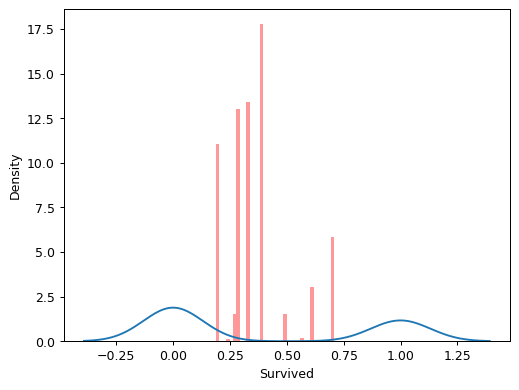

In [9]:
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=False)
ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("Survived")